In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss

Using TensorFlow backend.


In [2]:
dataframe= pd.read_csv('C:/Users/muneeza/Downloads/DSJ CLASS/internship/employees attrition.csv')
dataframe.describe()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
Attrition                14999 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [36]:
dataframe.Attrition.value_counts(1)

0    0.761917
1    0.238083
Name: Attrition, dtype: float64

In [3]:
dataframe[dataframe['Attrition']=='yes'].head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
11428,1,0.38,0.53,2,157,3,0,0,sales,low,yes
11429,2,0.80,0.86,5,262,6,0,0,sales,medium,yes
11430,3,0.11,0.88,7,272,4,0,0,sales,medium,yes
11431,4,0.72,0.87,5,223,5,0,0,sales,low,yes
11432,5,0.37,0.52,2,159,3,0,0,sales,low,yes


In [4]:
dataframe['salary']=dataframe['salary'].astype('category')
dataframe['dept']=dataframe['dept'].astype('category')
dataframe['Attrition']=dataframe['Attrition'].astype('category')

In [5]:
dataframe['salary']=dataframe['salary'].cat.codes
dataframe['dept']=dataframe['dept'].cat.codes
dataframe['Attrition']=dataframe['Attrition'].cat.codes

11428    1
11429    2
11430    2
11431    1
11432    1
11433    1
11434    1
11435    1
11436    1
11437    1
11438    1
11439    1
11440    1
11441    1
11442    1
11443    1
11444    1
11445    1
11446    1
11447    1
11448    1
11449    1
11450    1
11451    1
11452    1
11453    1
11454    1
11455    1
11456    1
11457    1
        ..
14969    2
14970    2
14971    2
14972    2
14973    2
14974    2
14975    2
14976    2
14977    2
14978    2
14979    2
14980    0
14981    1
14982    2
14983    2
14984    2
14985    2
14986    1
14987    1
14988    1
14989    1
14990    1
14991    1
14992    1
14993    1
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 3571, dtype: int8

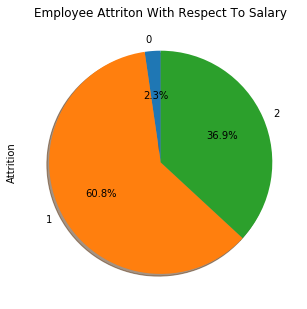

In [6]:
df=dataframe[11428:] # where the  attrition is true 
df=df.drop(['Emp ID'],axis=1 )
df_salary= df.groupby('salary',axis=0).sum()
df_salary['Attrition'].plot(kind='pie',figsize=(5,6),shadow=True,startangle=90,autopct='%1.1f%%')
plt.title('Employee Attriton With Respect To Salary')
plt.savefig('Employee Attriton With Respect To Salary')
df_salary.head()
df['salary']

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,dept,salary,Attrition
time_spend_company,,,,,,,,,
2,27.65,39.92,215,11171,1,0,340.0,84.0,53.0
3,653.02,824.75,3327,233740,74,15,9459.0,2094.0,1586.0
4,130.77,760.06,5305,239955,45,3,5347.0,1207.0,890.0
5,594.79,750.56,3965,205199,39,1,5039.0,1138.0,833.0
6,165.36,189.09,956,50629,10,0,1367.0,283.0,209.0


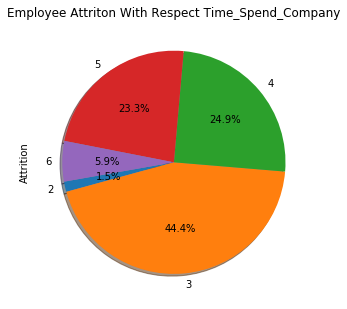

In [7]:
df_time_spend= df.groupby('time_spend_company',axis=0).sum()
df_time_spend['Attrition'].plot(kind='pie',figsize=(5,6),shadow=True,startangle=190,autopct='%1.1f%%')
plt.title('Employee Attriton With Respect Time_Spend_Company')
df_time_spend.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,dept,salary,Attrition
promotion_last_5years,,,,,,,,,
0,1562.85,2553.20,13710,737317,13781,165,21440.0,4782.0,3552.0
1,8.74,11.18,58,3377,62,4,112.0,24.0,19.0


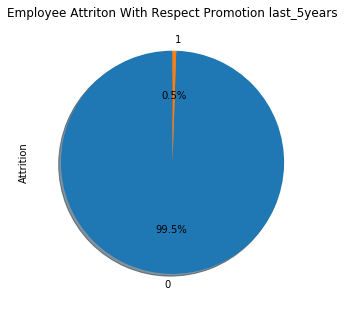

In [8]:
df_promotion= df.groupby('promotion_last_5years',axis=0).sum()
df_promotion['Attrition'].plot(kind='pie',figsize=(5,6),shadow=True,startangle=90,autopct='%1.1f%%')
plt.title('Employee Attriton With Respect Promotion last_5years')
df_promotion.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,dept,salary,Attrition
Work_accident,,,,,,,,,
0,1496.04,2443.30,13128,706060,13184,15,20512.0,4563.0,3402.0
1,75.55,121.08,640,34634,659,4,1040.0,243.0,169.0


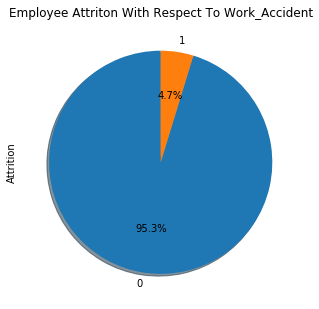

In [9]:
df_work= df.groupby('Work_accident',axis=0).sum()
df_work['Attrition'].plot(kind='pie',figsize=(5,6),shadow=True,startangle=90,autopct='%1.1f%%')
plt.title('Employee Attriton With Respect To Work_Accident')
df_work.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
number_project,,,,,,,,,
2,647.09,812.60,229268,4744,73,12,9367.0,2076.0,1567.0
3,41.75,54.23,15767,285,1,0,480.0,101.0,72.0
4,307.85,361.21,98995,2004,27,4,2472.0,565.0,409.0
5,460.43,552.07,149051,3080,29,0,3737.0,823.0,612.0
6,84.08,564.21,176937,2677,35,3,3992.0,879.0,655.0


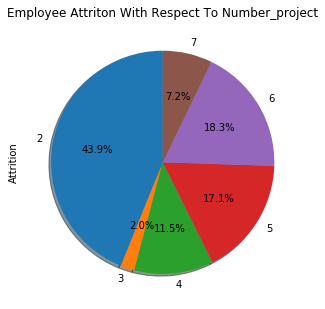

In [10]:
df_number_project= df.groupby('number_project',axis=0).sum()
df_number_project['Attrition'].plot(kind='pie',figsize=(5,6),shadow=True,startangle=90,autopct='%1.1f%%')
plt.title('Employee Attriton With Respect To Number_project')
df_number_project.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Attrition
dept,,,,,,,,,
0,112.44,199.30,1099,58381,1054,9,3,366.0,273.0
1,52.37,90.19,487,25528,484,10,0,179.0,121.0
2,82.13,141.68,790,42234,774,9,0,299.0,204.0
3,93.18,146.14,761,42421,807,7,0,326.0,215.0
4,38.48,66.18,377,18861,342,5,3,121.0,91.0


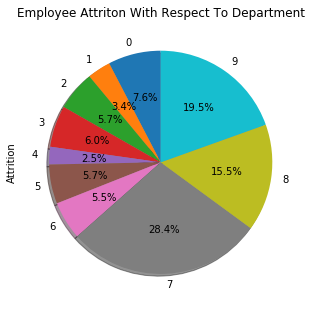

In [11]:
df_dept= df.groupby('dept',axis=0).sum()
df_dept['Attrition'].plot(kind='pie',figsize=(5,6),shadow=True,startangle=90,autopct='%1.1f%%')
plt.title('Employee Attriton With Respect To Department')
df_dept.head()

,satisfaction_level
11428,0.38
11429,0.80
11430,0.11
11431,0.72
11432,0.37


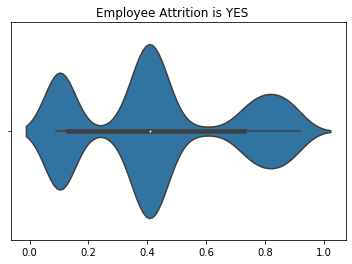

In [12]:
df_satis_level=df[['satisfaction_level']]
sns.violinplot(df_satis_level)
plt.title("Employee Attrition is YES   ")
df_satis_level.head()

,satisfaction_level
0,0.58
1,0.82
2,0.45
3,0.78
4,0.49


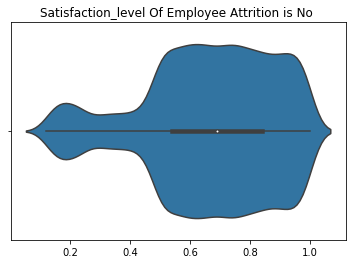

In [13]:
df_no=dataframe[:11428]
df_satis_level=df_no[['satisfaction_level']]
sns.violinplot(df_satis_level)
plt.title("Satisfaction_level Of Employee Attrition is No ")
df_satis_level.head()

,last_evaluation
11428,0.53
11429,0.86
11430,0.88
11431,0.87
11432,0.52


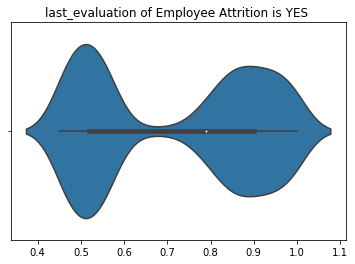

In [14]:
df_last_evaluation=df[['last_evaluation']]
sns.violinplot(df_last_evaluation)
plt.title("last_evaluation of Employee Attrition is YES ")
df_last_evaluation.head()

,last_evaluation
0,0.74
1,0.67
2,0.69
3,0.82
4,0.60


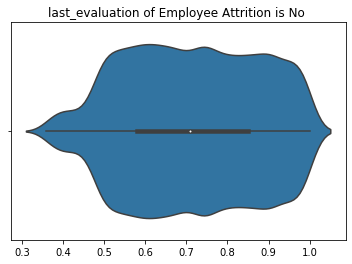

In [15]:
df_last_evaluation=df_no[['last_evaluation']]
sns.violinplot(df_last_evaluation)
plt.title("last_evaluation of Employee Attrition is No ")
df_last_evaluation.head()

,average_montly_hours
11428,157
11429,262
11430,272
11431,223
11432,159


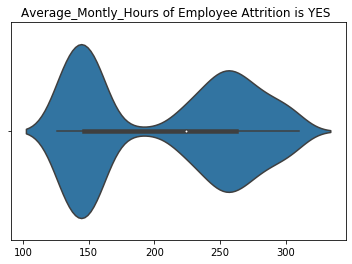

In [16]:
df_average_montly_hours=df[['average_montly_hours']]
sns.violinplot(df_average_montly_hours)
plt.title("Average_Montly_Hours of Employee Attrition is YES ")
df_average_montly_hours.head()

,average_montly_hours
0,215
1,202
2,193
3,247
4,214


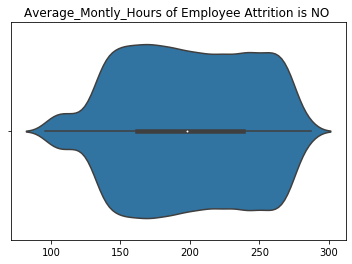

In [17]:
df_average_montly_hours=df_no[['average_montly_hours']]
sns.violinplot(df_average_montly_hours)
plt.title("Average_Montly_Hours of Employee Attrition is NO ")
df_average_montly_hours.head()

In [18]:
import warnings
X=dataframe.drop(['Attrition'],axis=1)
y=dataframe['Attrition']
X=StandardScaler().fit(X).transform(X)

C:\Users\muneeza\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\muneeza\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
y_test.shape

(4500,)

In [45]:
lr=LogisticRegression(C=0.01,solver='liblinear')
lr = lr.fit(X_train, y_train)

In [46]:
y_pred=lr.predict(X_test)
print("accuracy :",accuracy_score(y_pred,y_test))
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("classfication report\n",classification_report(y_pred,y_test))
print("log loss",log_loss(y_pred,y_test))

accuracy : 0.7946666666666666
confusion matrix [[3192  687]
 [ 237  384]]
classfication report
               precision    recall  f1-score   support

           0       0.93      0.82      0.87      3879
           1       0.36      0.62      0.45       621

   micro avg       0.79      0.79      0.79      4500
   macro avg       0.64      0.72      0.66      4500
weighted avg       0.85      0.79      0.82      4500

log loss 7.092084158296003


In [22]:
Confusion_matrix=pd.crosstab(y_pred,y_test,rownames=['pred'],colnames=['Actual'])
Confusion_matrix
#sns.heatmap(confusion_matrix,annot=True)

Actual,0,1
pred,,
0,3199,709
1,230,362


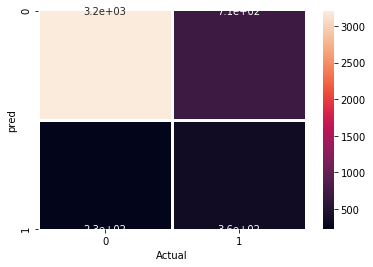

In [24]:
#plt.figure(figsize=[6,5])
sns.heatmap(Confusion_matrix,linecolor='white',linewidths=2,annot=True)
plt.show()

In [27]:
print("confusion matrix\n",confusion_matrix(y_pred,y_test))

confusion matrix
 [[3199  709]
 [ 230  362]]
